Install the k8s-env-discrete-state-discrete-action-V0 gym environment

In [1]:
!pip3 install -e ../../gym-k8s

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/eleni/PythonProjects/k8s-RL-autoscaler/gym-k8s
  Attempting uninstall: gym-k8s
    Found existing installation: gym-k8s 0.0.2
    Uninstalling gym-k8s-0.0.2:
      Successfully uninstalled gym-k8s-0.0.2
  Running setup.py develop for gym-k8s
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [18]:
import gym
env = gym.make('gym_k8s:k8s-env-discrete-state-discrete-action-v2', app_name='hello-python', sla_latency = 0.2, prometheus_host = 'http://localhost:9091/',  prometheus_latency_metric_name = "avg(haproxy_backend_response_time_average_seconds{proxy='default_hello-python_5000'})")
observation = env.reset()
print(observation)
env.P[125]

ob_baseline
[16, 20.0, 0.0]
----CURRENT STATE---
[1, 2, 1]
50


{0: [], 1: [], 2: []}

In [7]:
action = env.action_space.sample()
action

1

In [9]:
env.step(2) #scale both cpu and memory

In [10]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(3)
State Space Discrete(175)


In [11]:
import numpy as np
from numpy import asarray
from numpy import save
#q_table =np.full((env.observation_space.n, env.action_space.n), 50)
#q_table = np.zeros([env.observation_space.n, env.action_space.n])
#save('Q-k8s-env-discrete-state-discrete-action-V2-data.npy', asarray(q_table))

create and save the qtable

In [12]:
# load numpy array from npy file
from numpy import load
# load array
q_table = load('Q-k8s-env-discrete-state-discrete-action-V2-data.npy')
# print the array
print(q_table)

[[ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [ 50  50  50]
 [217 226 226]
 [ 52  50  65]
 [ 58  50  50]
 [ 50  50  50]
 [141  81  84]
 [ 50  50  50]
 [ 53  50  50]
 [187 177 226]
 [ 54  56  50]
 [ 75  57  73]
 [ 53  55 110]
 [ 55  69 132]
 [ 50  50  50]
 [ 68  54  50]
 [ 56  65 137]
 [ 50  54  52]
 [ 84  75  75]
 [ 50  54  65]
 [ 74  74  77]
 [ 50  50  50]
 [ 65  59  62]
 [ 64  62  63]
 [ 50  50  50]
 [ 62  62 

create and save the training results files

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

'''
average_reward_results = {'timesteps': [],'average_reward': []}
df_average_reward = pd.DataFrame(average_reward_results, columns = ['timesteps', 'average_reward'])
df_average_reward.to_csv ('average_reward.csv', index = False, header=True)
# gca stands for 'get current axis'
ax = plt.gca()
df_average_reward.plot(kind='line',x='timesteps',y='average_reward',ax=ax)
plt.show()
'''

#load dataframe
df_average_reward = pd.read_csv("average_reward.csv") 
# Preview the first 5 lines of the loaded data 
df_average_reward.head()

timesteps  average_reward
0       27.0           100.0
1       27.0           100.0
2       27.0           100.0
3       27.0           100.0
4       27.0           100.0

Training the agent

In [ ]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output


# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.3


#for i in range(1, 100001):
for i in range(1, 2):
    state = env.reset()
    print(state)

    epochs, reward, total_reward, = 0, 0, 0
    done = False
    
    
    for x in range(2):
        if not done:
                
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space, non-greedy (NG) action selection 
            else:
                action = np.argmax(q_table[state]) # Exploit learned values, greedy (G) action selection

            next_state, reward, done, info = env.step(action)
            
            mytuple = next_state, reward, done, info
            
            ####save historical tuple###
            with open('k8s_historical_states_discrete.csv', 'a') as f:
                f.write(','.join(str(s) for s in mytuple)+','+str(state)+','+str(action))
                f.write('\n')
                f.close()
            ###END of save historical tuple###

        
            old_value = q_table[state, action]
            print('old_value')
            print(old_value)
            
            print('q_table[next_state]')
            print(q_table[next_state])
            
            next_max = np.max(q_table[next_state]) # q-table update is always greedy (np.max). q-learning is off-police since the action taken can be of different policy (non-greedy, random) (NG)
        
            print(next_max)
            print('next_max')
            
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            
            print('new_value')
            print(new_value)
            
            q_table[state, action] = new_value
            print('q_table[state, action]')
            print(q_table[state, action])
            save('Q-k8s-env-discrete-state-discrete-action-V2-data.npy', asarray(q_table))

            print('next_state, reward, action')
            print(next_state, reward, action)
            
            total_reward += reward                 
                 
            state = next_state
            epochs += 1
             
                 
    average_reward  = total_reward/2
    print("Timesteps taken: {}".format(i))
    print("average_reward: {}".format(average_reward))
    
    df_average_reward = pd.read_csv("average_reward.csv")                 
    new_row_average_reward = {'timesteps':i, 'average_reward':average_reward}
    df_average_reward = df_average_reward.append(new_row_average_reward, ignore_index=True)
    df_average_reward.to_csv ('average_reward.csv', index = False, header=True)
                     

print("Training finished.\n")


Federated Learning
--------------------------

Separete execution in batches of 1 hour ~ 64 minutes

30 minutes the services are not stressed at all , 30 minutes are stressed

Since every action needs ~8 minutes to get enforced we have 8 samples every hour for each service

deploy 67 services of hello-python

For each epoch we have 8 * 60  ~ 480 timesteps

So each epoch is composed by 480 timesteps

and the duration of each epoch is 8 minutes * 8 steps = 64 minutes

This function deploys a set of new services in k8s

In [11]:
import subprocess
def deploy_service(num_service):
    #create new manifest
    fin = open("hello_python_app_deployment_files/deployment-hello-python.yaml", "rt")
    #output file to write the result to
    fout = open("hello_python_app_deployment_files/deployment-hello-python"+str(num_service)+".yaml", "wt")
    #for each line in the input file
    for line in fin:
        #read replace the string and write to output file
        fout.write(line.replace('name_to_replace', 'hello-python'+str(num_service)))
    #close input and output files
    fin.close()
    fout.close()

    #deploy service
    msg1 = subprocess.getoutput('kubectl create -f hello_python_app_deployment_files/deployment-hello-python'+str(num_service)+'.yaml')
    print(msg1)

In [7]:
import subprocess
def delete_service(num_service):
    #deploy service
    msg1 = subprocess.getoutput('kubectl delete -n default deployment hello-python'+str(num_service))
    print(msg1)
    msg2 = subprocess.getoutput('kubectl delete -n default service hello-python'+str(num_service))
    print(msg2)
    
def delete_hpa(num_service):
    #deploy service
    msg1 = subprocess.getoutput('kubectl delete hpa hello-python'+str(num_service))
    print(msg1)

#delete_service(0)
#delete_service(1)

This function update the ingress controller for the new services

In [12]:
def update_ingress(num_of_ingresses):
    # copy baseline file
    with open('hello_python_app_deployment_files/ingress.yaml','r') as firstfile, open('hello_python_app_deployment_files/ingress'+str(num_of_ingresses)+'.yaml','a') as secondfile:  
        for line in firstfile:
            secondfile.write(line)
    
    file1 = open('hello_python_app_deployment_files/ingress'+str(num_of_ingresses)+'.yaml', "a")  # 
    for i in range(num_of_ingresses):
        file1.write('      - backend:\n')
        file1.write('          serviceName: hello-python'+str(i)+' \n')
        file1.write('          servicePort: 5000\n')
        file1.write('        path: /hello-python'+str(i)+'\n')
    file1.close()
    #deploy ingress
    msg1 = subprocess.getoutput('kubectl apply -f hello_python_app_deployment_files/ingress'+str(num_of_ingresses)+'.yaml')
    print(msg1)

In [56]:
#update_ingress(2)    

In [17]:
import random
from IPython.display import clear_output


def train_agent(num_service):
    %%time
    """Training the agent"""
    # Hyperparameters
    alpha = 0.1
    gamma = 0.6
    epsilon = 0.3
    app_name = 'hello-python' + str(num_service)
    prometheus_latency_metric_name = "avg(haproxy_backend_response_time_average_seconds{proxy='default_hello-python_5000'})"
    prometheus_latency_metric_name = prometheus_latency_metric_name.replace("hello-python", app_name)
    env = gym.make('gym_k8s:k8s-env-discrete-state-discrete-action-v2', app_name=app_name, sla_latency = 0.2, prometheus_host = 'http://localhost:9091/',  prometheus_latency_metric_name = prometheus_latency_metric_name)
    #for i in range(2):
    for i in range(27,33):    
        state = env.reset()
        print(state)

        epochs, reward, total_reward, = 0, 0, 0
        done = False
    
    
        for x in range(8):
            print('======ROUND'+str(x)+'=======')
            if not done:
                
                if random.uniform(0, 1) < epsilon:
                    action = env.action_space.sample() # Explore action space, non-greedy (NG) action selection 
                else:
                    action = np.argmax(q_table[state]) # Exploit learned values, greedy (G) action selection

                print('app: '+app_name , 'action:' + str(action))
                next_state, reward, done, info = env.step(action)            
                mytuple = next_state, reward, done, info
            
                ####save historical tuple###
                with open('k8s_historical_states_discrete.csv', 'a') as f:
                    f.write(','.join(str(s) for s in mytuple)+','+str(state)+','+str(action))
                    f.write('\n')
                    f.close()

        
                old_value = q_table[state, action]
                next_max = np.max(q_table[next_state]) # q-table update is always greedy (np.max). q-learning is off-police since the action taken can be of different policy (non-greedy, random) (NG)
                new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
                q_table[state, action] = new_value
                print('app: '+app_name , 'state: '+ str(state), 'action:' + str(action), 'new_value: ' +str(new_value) , 'next_state: ' + str(next_state), 'reward: '+ str(reward))
                save('Q-k8s-env-discrete-state-discrete-action-V2-data.npy', asarray(q_table))
                total_reward += reward  
                state = next_state
                epochs += 1
             
                 
        average_reward  = total_reward/8
        print("Timesteps taken: {}".format(i))
        print("average_reward: {}".format(average_reward))
        df_average_reward = pd.read_csv("average_reward.csv")                 
        new_row_average_reward = {'timesteps':i, 'average_reward':average_reward}
        df_average_reward = df_average_reward.append(new_row_average_reward, ignore_index=True)
        df_average_reward.to_csv ('average_reward.csv', index = False, header=True)            

        print("Training finished.\n")


In [22]:
#train_agent(0)

Deploy services in k8s

In [ ]:
from multiprocessing import Process, Queue
import random

queue = Queue()

num_of_ingresses = 60
update_ingress(num_of_ingresses)
processes = [Process(target=deploy_service(x)) for x in range(60)]

for p in processes:
    p.start()

for p in processes:
    p.join()


Create one thead per environment and execute them

In [ ]:
import logging
import threading
import time


for x in range(60):
    mythread = threading.Thread(target=train_agent, args=(x,))
    mythread.start()

In [ ]:
Get results per epoch

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
ax = plt.gca() 
data = pd.read_csv("/home/eleni/PythonProjects/k8s-RL-autoscaler/agents/k8s-env-discrete-state-discrete-action-V2/average_reward.csv") 
data.head()
data1 = (data.groupby(['timesteps'], as_index=False).mean())
data1.plot(kind='line',x='timesteps',y='average_reward',ax=ax)
plt.show()

See existing results regardint the average reward

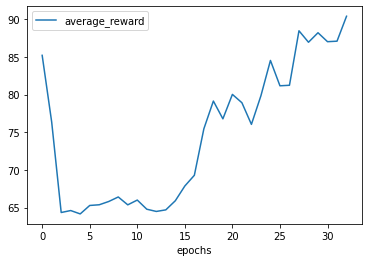

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
ax = plt.gca()

data = pd.read_csv("/home/eleni/PythonProjects/k8s-RL-autoscaler/agents/k8s-env-discrete-state-discrete-action-V2/grouped_average_reward.csv") 
data.plot(kind='line',x='epochs',y='average_reward',ax=ax)
plt.show()

Delete all hpas

In [ ]:
from multiprocessing import Process, Queue
queue = Queue()

processes = [Process(target=delete_hpa(x)) for x in range(100)]

for p in processes:
    p.start()

for p in processes:
    p.join()

Delete services

In [ ]:
queue = Queue()

processes = [Process(target=delete_service(x)) for x in range(100)]

for p in processes:
    p.start()

for p in processes:
    p.join()